# K-Means Clustering from Scratch

This notebook implements the K-Means clustering algorithm from scratch using Python. K-Means is an unsupervised learning algorithm that partitions data into k clusters by minimizing the within-cluster sum of squares.

## Algorithm Overview
1. Initialize k centroids randomly
2. Assign each data point to the nearest centroid
3. Update centroids to the mean of assigned points
4. Repeat steps 2-3 until convergence


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


## K-Means Implementation from Scratch


In [2]:
class KMeans:
    """
    K-Means clustering algorithm implementation from scratch.
    """

    def __init__(self, n_clusters=3, max_iters=300, tol=1e-4, random_state=42):
        """
        Initialize K-Means algorithm.

        Parameters:
        -----------
        n_clusters : int, default=3
            Number of clusters to form
        max_iters : int, default=300
            Maximum number of iterations
        tol : float, default=1e-4
            Tolerance for convergence
        random_state : int, default=42
            Random seed for reproducibility
        """
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None
        self.inertia_ = None

    def _initialize_centroids(self, X):
        """Initialize centroids using random selection from data points."""
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        return X[indices]

    def _assign_clusters(self, X):
        """Assign each data point to the nearest centroid."""
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def _update_centroids(self, X, labels):
        """Update centroids to the mean of assigned points."""
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            if np.sum(labels == k) > 0:
                new_centroids[k] = X[labels == k].mean(axis=0)
        return new_centroids

    def _compute_inertia(self, X, labels):
        """Compute within-cluster sum of squares (inertia)."""
        inertia = 0
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                inertia += np.sum((cluster_points - self.centroids[k])**2)
        return inertia

    def fit(self, X):
        """
        Fit the K-Means model to the data.

        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            Training data
        """
        X = np.array(X)
        self.centroids = self._initialize_centroids(X)

        for iteration in range(self.max_iters):
            # Assign clusters
            labels = self._assign_clusters(X)

            # Update centroids
            new_centroids = self._update_centroids(X, labels)

            # Check for convergence
            if np.allclose(self.centroids, new_centroids, atol=self.tol):
                print(f"Converged at iteration {iteration + 1}")
                break

            self.centroids = new_centroids

        self.labels_ = labels
        self.inertia_ = self._compute_inertia(X, labels)
        return self

    def predict(self, X):
        """Predict the closest cluster for each sample in X."""
        X = np.array(X)
        return self._assign_clusters(X)


## Generate Synthetic Dataset


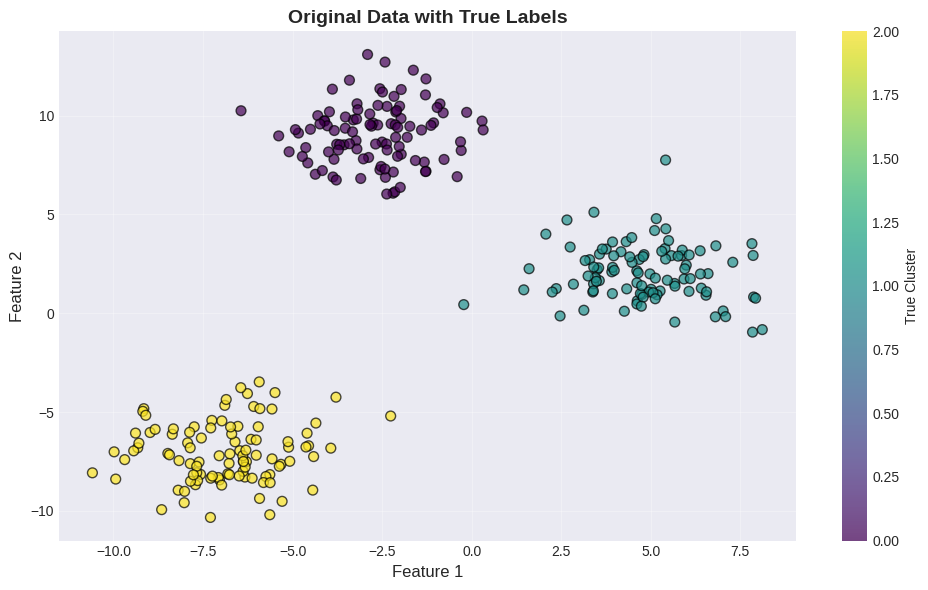

Dataset shape: (300, 2)
Number of true clusters: 3


In [3]:
# Generate synthetic dataset with 3 clusters
X, y_true = make_blobs(n_samples=300, centers=3, n_features=2,
                       random_state=42, cluster_std=1.5)

# Visualize the original data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
plt.title('Original Data with True Labels', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.colorbar(label='True Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Dataset shape: {X.shape}")
print(f"Number of true clusters: {len(np.unique(y_true))}")


## Apply K-Means Clustering


Converged at iteration 4


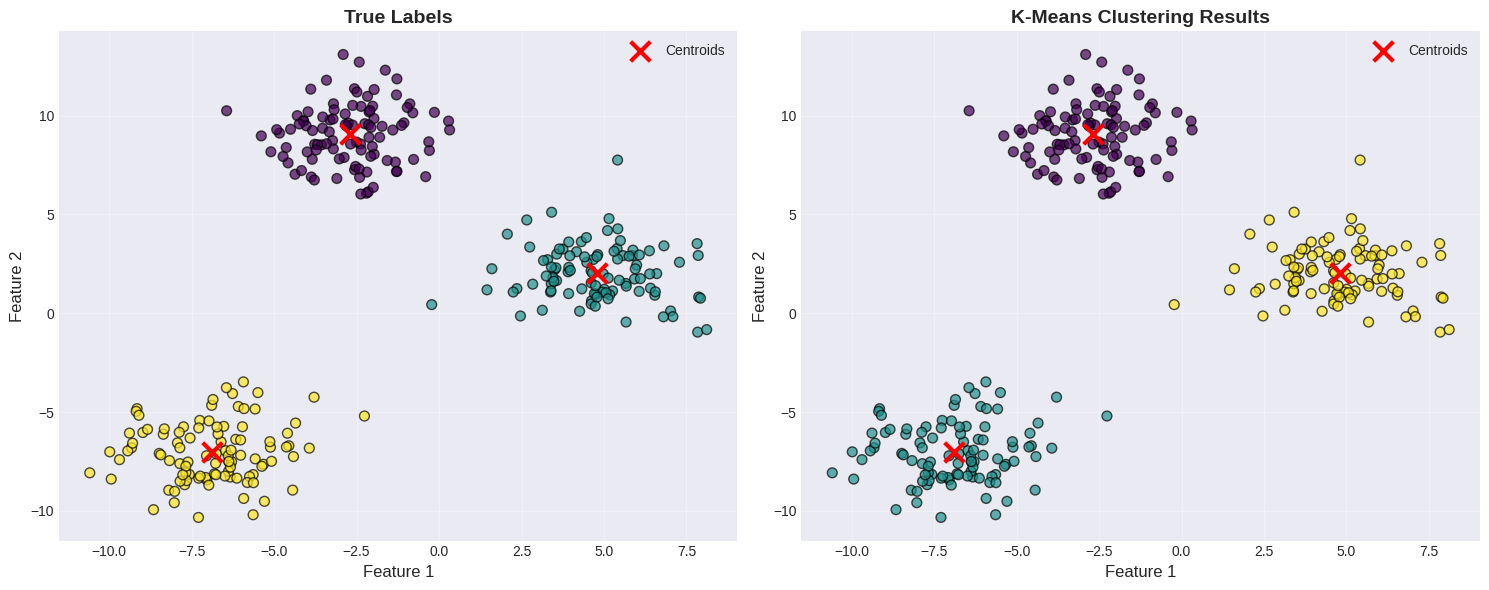

Inertia (Within-cluster sum of squares): 1275.43
Centroids:
[[-2.69525021  9.05821161]
 [-6.88599409 -7.03592142]
 [ 4.80071564  2.02930657]]


In [4]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, max_iters=300, random_state=42)
kmeans.fit(X)
y_pred = kmeans.labels_

# Visualize the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# True labels
axes[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
axes[0].scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
                c='red', marker='x', s=200, linewidths=3, label='Centroids')
axes[0].set_title('True Labels', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature 1', fontsize=12)
axes[0].set_ylabel('Feature 2', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Predicted labels
axes[1].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
axes[1].scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
                c='red', marker='x', s=200, linewidths=3, label='Centroids')
axes[1].set_title('K-Means Clustering Results', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Feature 1', fontsize=12)
axes[1].set_ylabel('Feature 2', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Inertia (Within-cluster sum of squares): {kmeans.inertia_:.2f}")
print(f"Centroids:\n{kmeans.centroids}")


## Clustering Quality Metrics


In [5]:
# Calculate clustering quality metrics
silhouette = silhouette_score(X, y_pred)
ari = adjusted_rand_score(y_true, y_pred)

print("=" * 50)
print("CLUSTERING QUALITY METRICS")
print("=" * 50)
print(f"Silhouette Score: {silhouette:.4f}")
print(f"  - Range: [-1, 1], higher is better")
print(f"  - Values close to 1 indicate well-separated clusters")
print()
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"  - Range: [-1, 1], higher is better")
print(f"  - Measures similarity between true and predicted labels")
print()
print(f"Inertia: {kmeans.inertia_:.2f}")
print(f"  - Lower is better (within-cluster sum of squares)")
print("=" * 50)


CLUSTERING QUALITY METRICS
Silhouette Score: 0.7734
  - Range: [-1, 1], higher is better
  - Values close to 1 indicate well-separated clusters

Adjusted Rand Index (ARI): 1.0000
  - Range: [-1, 1], higher is better
  - Measures similarity between true and predicted labels

Inertia: 1275.43
  - Lower is better (within-cluster sum of squares)


## Finding Optimal Number of Clusters (Elbow Method)


Converged at iteration 2
Converged at iteration 4
Converged at iteration 5
Converged at iteration 7
Converged at iteration 8
Converged at iteration 8


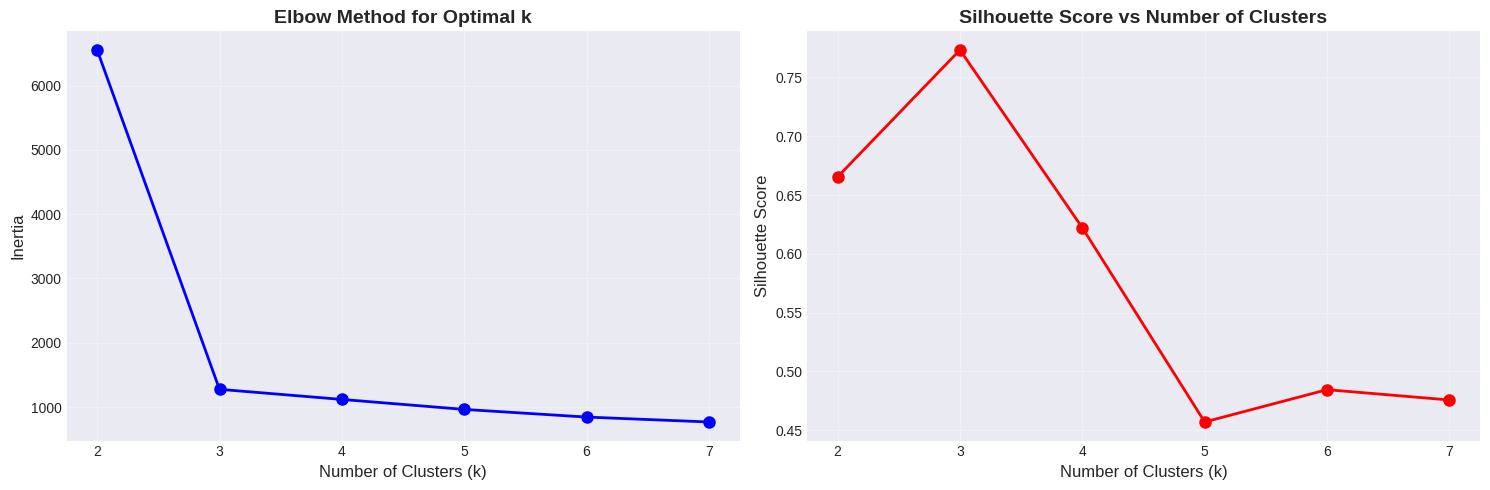

Optimal number of clusters based on silhouette score: 3
Maximum silhouette score: 0.7734


In [6]:
# Test different values of k
k_range = range(2, 8)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans_test = KMeans(n_clusters=k, max_iters=300, random_state=42)
    kmeans_test.fit(X)
    inertias.append(kmeans_test.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans_test.labels_))

# Plot elbow curve and silhouette scores
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Elbow method
axes[0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_range)

# Silhouette scores
axes[1].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_range)

plt.tight_layout()
plt.show()

# Find optimal k based on silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")
print(f"Maximum silhouette score: {max(silhouette_scores):.4f}")


## Real-World Example: Iris Dataset


Converged at iteration 7
IRIS DATASET RESULTS
Silhouette Score: 0.4630
Adjusted Rand Index: 0.5923
Inertia: 140.03


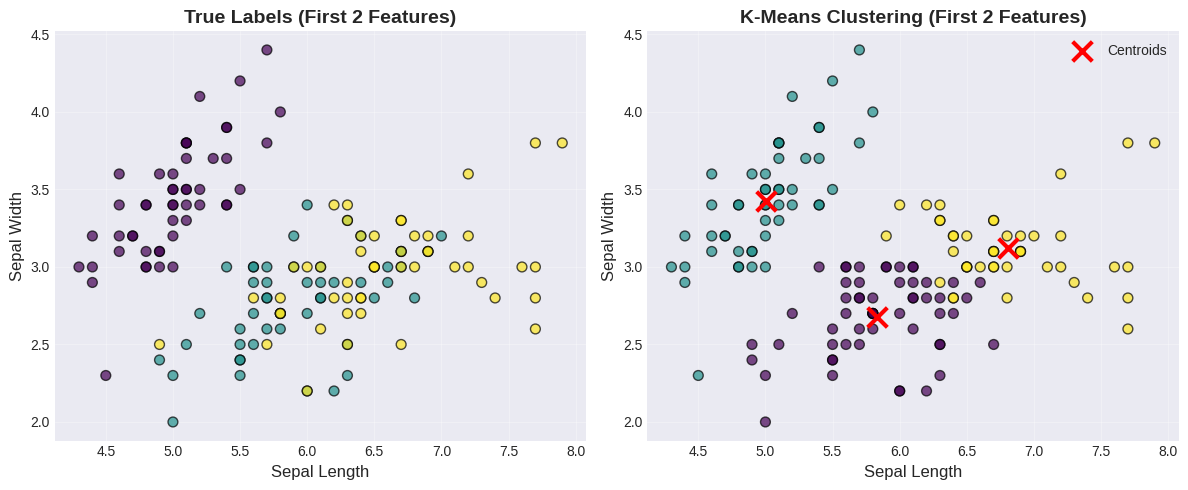

In [7]:
# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Standardize the features
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# Apply K-Means
kmeans_iris = KMeans(n_clusters=3, max_iters=300, random_state=42)
kmeans_iris.fit(X_iris_scaled)
y_iris_pred = kmeans_iris.labels_

# Calculate metrics
silhouette_iris = silhouette_score(X_iris_scaled, y_iris_pred)
ari_iris = adjusted_rand_score(y_iris, y_iris_pred)

print("IRIS DATASET RESULTS")
print("=" * 50)
print(f"Silhouette Score: {silhouette_iris:.4f}")
print(f"Adjusted Rand Index: {ari_iris:.4f}")
print(f"Inertia: {kmeans_iris.inertia_:.2f}")
print("=" * 50)

# Visualize using first two features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
plt.title('True Labels (First 2 Features)', fontsize=14, fontweight='bold')
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris_pred, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
centroids_2d = scaler.inverse_transform(kmeans_iris.centroids)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1],
            c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('K-Means Clustering (First 2 Features)', fontsize=14, fontweight='bold')
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Summary

This notebook demonstrated:
1. Implementation of K-Means clustering algorithm from scratch
2. Application to synthetic and real-world datasets
3. Evaluation using quality metrics (Silhouette Score, ARI, Inertia)
4. Finding optimal number of clusters using elbow method and silhouette analysis

### Key Takeaways:
- K-Means is an iterative algorithm that minimizes within-cluster variance
- The algorithm requires specifying the number of clusters beforehand
- Quality metrics help evaluate clustering performance
- Standardization is important when features have different scales
